In [39]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [40]:
# Loading and examining the dataset
penguins_df = pd.read_csv("/kaggle/input/penguins-unsupervised-learning/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [41]:
penguins_df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [42]:
columns = penguins_df.columns.tolist()
columns

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

In [43]:
penguins_df.iloc[:,1].mean()

17.151169590643278

In [44]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [45]:
penguins_df.sex.value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [46]:
penguins_df2 = penguins_df.dropna()
penguins_df2.shape

(335, 5)

In [47]:
penguins_df2['sex'] = penguins_df2.sex.apply(lambda x:1 if x=="MALE" else 0)
penguins_df2.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [48]:
min_value,max_value = penguins_df2.iloc[:,0].quantile([0.05,0.95])
min_value,max_value

(35.7, 52.0)

In [49]:
penguins_df2.quantile([0.05,0.95])

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0.05,35.7,13.90,181.0,3150.0,0.0
0.95,52.0,20.03,225.0,5665.0,1.0


In [50]:
for i in range(4):
    min_value,max_value = penguins_df2.iloc[:,i].quantile([0.05,0.95])
    penguins_df2.iloc[:,i] = penguins_df2.iloc[:,i].apply(lambda x: min_value if x<min_value else x)
penguins_df2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,335.000000,335.000000,335.000000,335.000000,335.000000
mean,44.042687,17.185075,215.400000,4218.432836,0.504478
std,5.359976,1.944057,262.559525,789.781866,0.500728
min,35.700000,13.900000,181.000000,3150.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.550000,18.700000,213.000000,4787.500000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


In [51]:
for i in range(4):
    min_value,max_value = penguins_df2.iloc[:,i].quantile([0.05,0.95])
    penguins_df2.iloc[:,i] = penguins_df2.iloc[:,i].apply(lambda x: max_value if x>max_value else x)
penguins_df2.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,335.000000,335.000000,335.000000,335.000000,335.000000
mean,43.940299,17.149582,200.961194,4208.447761,0.504478
std,5.161287,1.882125,13.570673,769.034979,0.500728
min,35.700000,13.900000,181.000000,3150.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.500000,17.300000,197.000000,4050.000000,1.000000
75%,48.550000,18.700000,213.000000,4787.500000,1.000000
max,52.000000,20.030000,225.000000,5665.000000,1.000000


In [52]:
penguins_df3 = pd.DataFrame()
for i in range(5):
    max_value = penguins_df2.iloc[:,i].max()
    penguins_df3[columns[i]] = penguins_df2.iloc[:,i].apply(lambda x: x/max_value)


In [53]:
penguins_df3.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.751923,0.933600,0.804444,0.661959,1.0
1,0.759615,0.868697,0.826667,0.670786,0.0
2,0.775000,0.898652,0.866667,0.573698,0.0
4,0.705769,0.963555,0.857778,0.609003,0.0
5,0.755769,1.000000,0.844444,0.644307,1.0


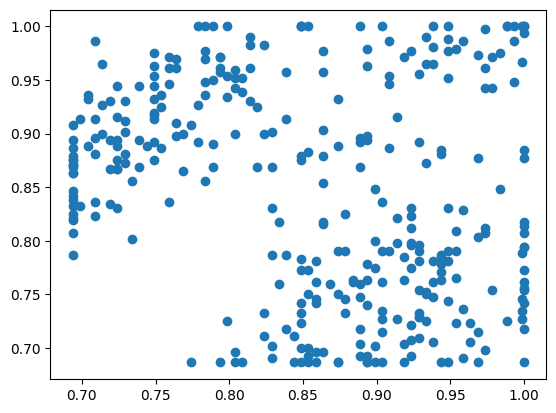

In [54]:
import matplotlib.pyplot as plt
plt.scatter(penguins_df3.culmen_depth_mm,penguins_df3.culmen_length_mm)
plt.show()

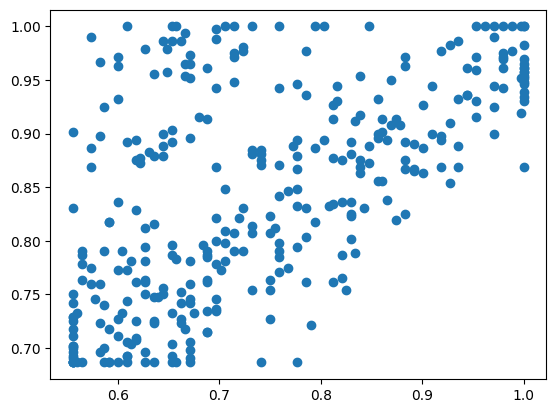

In [55]:
plt.scatter(penguins_df3.body_mass_g,penguins_df3.culmen_length_mm)
plt.show()

In [56]:
model = KMeans(n_clusters=3)
model.fit(penguins_df3)
df4 = model.transform(penguins_df3)

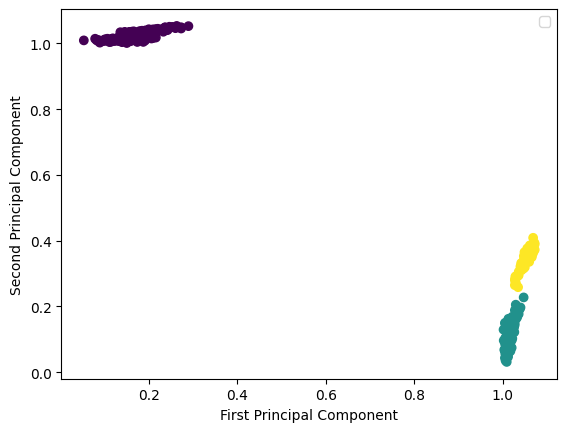

In [57]:
plt.scatter(df4[:, 0], df4[:, 1], c=model.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

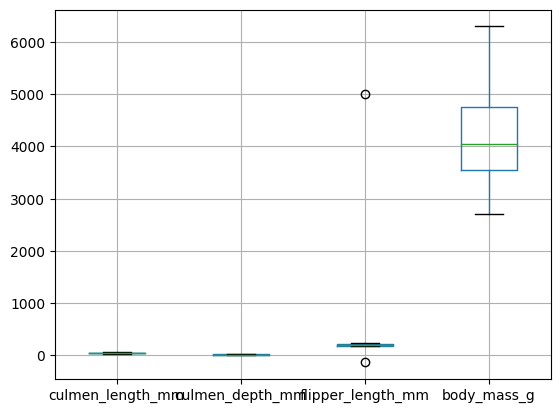

In [58]:
penguins_df.boxplot()  
plt.show()
penguins_df = penguins_df.dropna()
penguins_df[penguins_df['flipper_length_mm']>4000]
penguins_df[penguins_df['flipper_length_mm']<0]
penguins_clean = penguins_df.drop([9,14])

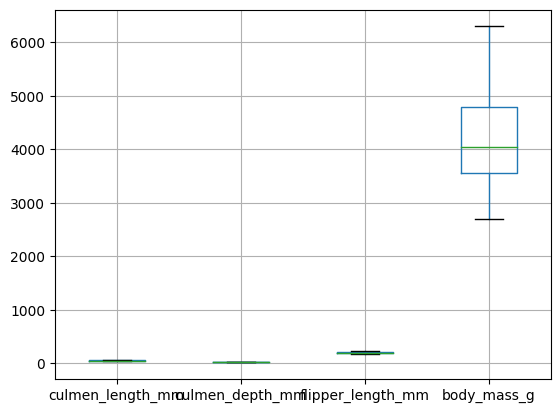

In [59]:
penguins_clean.boxplot()  
plt.show()

In [60]:
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [61]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


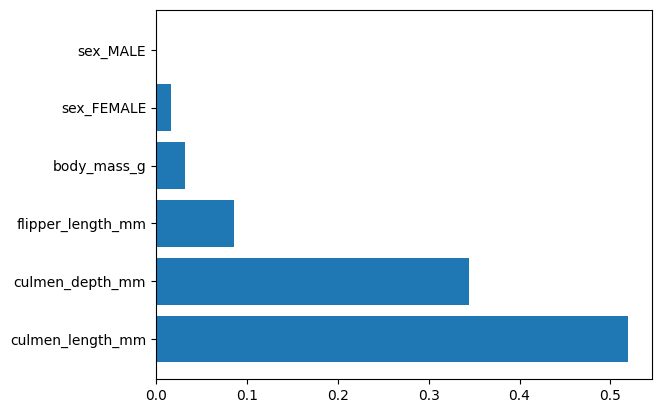

In [62]:
# Step 5 - Perform PCA
pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_
plt.barh(df.columns,dfx_pca.explained_variance_ratio_)
plt.show()

In [63]:
n_components=sum(dfx_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

In [64]:
penguins_PCA.shape

(333, 2)

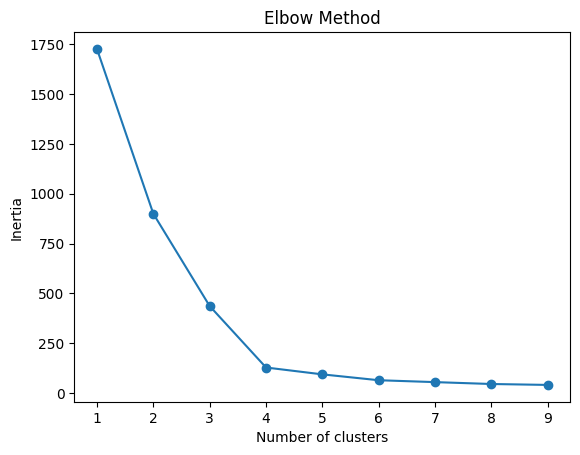

In [65]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


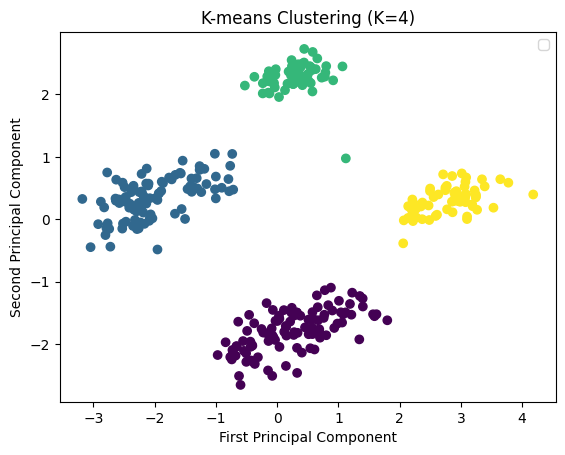

In [66]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()